In [1]:
# 경고(warning)비표시
import warnings
warnings.filterwarnings('ignore')

In [2]:
## happiness score : 행복지수
## GDP per capita : 1인당 국내 총생산 (평균 소득 수준)
## social suppory : 사회적 지지 정도 (사회적 연대)
## healty life expectancy : 건강한 기대 수명
## freedom tp make life choices : 선택의 자유 (하고싶은 것을 할 수 있는 자유)
## generosity : 관용, 너그러움
## upperwhisker : 최대값(boxplot에서 상자의 위쪽 수염)
## lowerwhisker : 최소값
## Dystopia : 불안정하고 불행한 사회적 환경, 특정 상황이나 사회적 현상에 대한 부정적인 감정이나 평가

In [13]:
import pandas as pd

df2020 = pd.read_csv("Data/2020.csv", index_col=0)
df2021 = pd.read_csv("Data/2021.csv", index_col=0)

In [14]:
df2020.dtypes

Country name                     object
Happiness score                 float64
upperwhisker                    float64
lowerwhisker                    float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Dystopia                        float64
dtype: object

In [15]:
df2020.head(2)

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.8087,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,2.762835
2,Denmark,7.6456,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,2.432741


### Data 가공

In [16]:
# 불필요한 컬럼 삭제
df2020.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis = 1, inplace = True)
df2021.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis = 1, inplace = True)

In [17]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  153 non-null    object 
 1   Happiness score               153 non-null    float64
 2   GDP per capita                153 non-null    float64
 3   Social support                153 non-null    float64
 4   Healthy life expectancy       153 non-null    float64
 5   Freedom to make life choices  153 non-null    float64
 6   Generosity                    153 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.6+ KB


In [20]:
#항목의 이름 변경 (공백을 _ 로 )

df2020.columns = df2020.columns.str.replace(' ' , '_')
df2021.columns = df2021.columns.str.replace(' ' , '_')

In [21]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country_name                  153 non-null    object 
 1   Happiness_score               153 non-null    float64
 2   GDP_per_capita                153 non-null    float64
 3   Social_support                153 non-null    float64
 4   Healthy_life_expectancy       153 non-null    float64
 5   Freedom_to_make_life_choices  153 non-null    float64
 6   Generosity                    153 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.6+ KB


In [22]:
df2021.head(2)

,Country_name,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity
Rank,,,,,,,
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030


In [23]:
df2020.columns=['Country','Score','GDP.per.capita','Social.support','Life.expectancy','Freedom','Generosity']
df2021.columns=['Country','Score','GDP.per.capita','Social.support','Life.expectancy','Freedom','Generosity']

In [24]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          153 non-null    object 
 1   Score            153 non-null    float64
 2   GDP.per.capita   153 non-null    float64
 3   Social.support   153 non-null    float64
 4   Life.expectancy  153 non-null    float64
 5   Freedom          153 non-null    float64
 6   Generosity       153 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.6+ KB


### Data 시각화

In [26]:
#행복지수에 영향주는 요인 파악
# 행복 점수와 각 항묵의 상관관계

df1 = df2020.copy()
df1.drop(['Social.support', 'Life.expectancy', 'Generosity'], axis = 1, inplace = True )

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         153 non-null    object 
 1   Score           153 non-null    float64
 2   GDP.per.capita  153 non-null    float64
 3   Freedom         153 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.0+ KB


In [30]:
# 상관게수

corr = df1.corr(numeric_only = True)
corr

,Score,GDP.per.capita,Freedom
Score,1.000000,0.775374,0.590597
GDP.per.capita,0.775374,1.000000,0.419019
Freedom,0.590597,0.419019,1.000000


<Axes: >

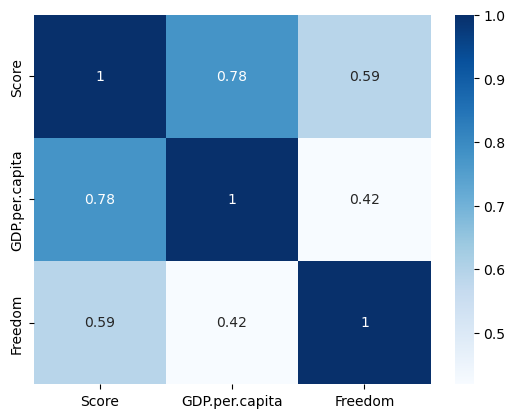

In [32]:
## 히트맵

import seaborn as sns
sns.heatmap(corr, annot = True, cmap = 'Blues')

In [33]:
df2 = df2021.copy()
df2.drop(['Social.support', 'Life.expectancy', 'Generosity'], axis = 1, inplace = True )

In [34]:
corr2 = df2.corr(numeric_only = True)
corr2

,Score,GDP.per.capita,Freedom
Score,1.000000,0.789760,0.607753
GDP.per.capita,0.789760,1.000000,0.432323
Freedom,0.607753,0.432323,1.000000


<Axes: >

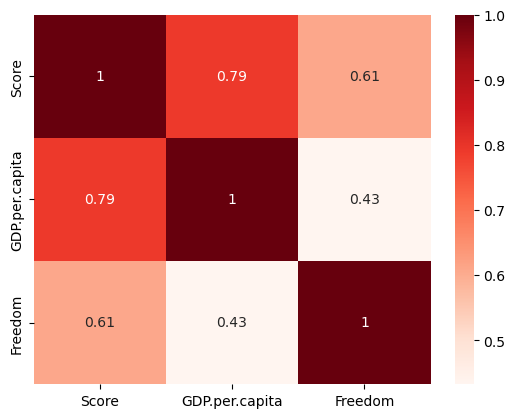

In [36]:
sns.heatmap(corr2, annot = True, cmap = 'Reds')

<Axes: >

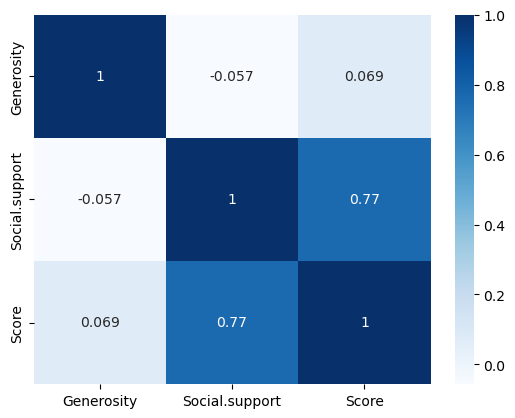

In [40]:
df3 = df2020[['Generosity', 'Social.support','Score']].copy()
corr3 = df3.corr(numeric_only = True)
sns.heatmap(corr3, annot = True, cmap = 'Blues')

In [39]:
corr3


,Generosity,Social.support,Score
Generosity,1.000000,-0.056780,0.069043
Social.support,-0.056780,1.000000,0.765001
Score,0.069043,0.765001,1.000000


<Axes: >

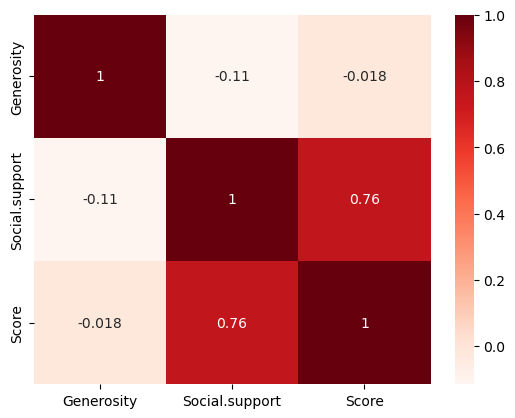

In [38]:
df4 = df2021[['Generosity', 'Social.support','Score']].copy()
corr4 = df4.corr(numeric_only = True)
corr4
sns.heatmap(corr4, annot = True, cmap = 'Reds')

In [42]:
economy = df2020.loc[:,['Country', 'GDP.per.capita']]
economy

,Country,GDP.per.capita
Rank,,
1,Finland,10.639267
2,Denmark,10.774001
3,Switzerland,10.979933
4,Iceland,10.772559
5,Norway,11.087804
...,...,...
149,Central African Republic,6.625160
150,Rwanda,7.600104
151,Zimbabwe,7.865712


In [44]:
economy = economy.groupby(economy.Country)['GDP.per.capita'].mean().sort_values(ascending = False )
economy

Country
Luxembourg                  11.450681
Singapore                   11.395521
Ireland                     11.160978
United Arab Emirates        11.109999
Kuwait                      11.089825
                              ...    
Liberia                      7.054380
Niger                        6.842167
Congo (Kinshasa)             6.694256
Central African Republic     6.625160
Burundi                      6.492642
Name: GDP.per.capita, Length: 153, dtype: float64

In [45]:
economy = economy.rank(method = 'min', ascending = False )['South Korea']
economy

27.0

In [47]:
#동점일경우 작은순위로 해당 모두 표시 (min)

In [48]:
social = df2020.loc[:,['Country', 'Social.support']]
social = social.groupby(social.Country)['Social.support'].mean().sort_values(ascending = False )
social

Country
Iceland                     0.974670
Turkmenistan                0.958966
Denmark                     0.955991
Finland                     0.954330
Norway                      0.952487
                              ...   
Rwanda                      0.540835
Burundi                     0.490326
Afghanistan                 0.470367
Benin                       0.468671
Central African Republic    0.319460
Name: Social.support, Length: 153, dtype: float64

In [49]:
social = social.rank(method = 'min', ascending = False )['South Korea']
social

99.0

In [51]:
life = df2020.loc[:,['Country', 'Life.expectancy']]
life = life.groupby(life.Country)['Life.expectancy'].mean().sort_values(ascending = False )
life

Country
Singapore                    76.804581
Hong Kong S.A.R. of China    76.771706
Japan                        75.000969
Spain                        74.402710
Switzerland                  74.102448
                               ...    
Nigeria                      49.861908
Ivory Coast                  49.503773
Chad                         48.220539
Lesotho                      48.003624
Central African Republic     45.200001
Name: Life.expectancy, Length: 153, dtype: float64

In [52]:
life = life.rank(method = 'max', ascending = False )['South Korea']
life

10.0

In [53]:
freedom = df2020.loc[:,['Country', 'Freedom']]
freedom = freedom.groupby(freedom.Country)['Freedom'].mean().sort_values(ascending = False )
freedom = freedom.rank(method = 'max', ascending = False )['South Korea']
freedom

140.0